In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import json
import time
import pandas as pd
from dateutil.relativedelta import relativedelta
from datetime import datetime

In [2]:
url = 'http://en.wikipedia.org/w/api.php?action=query&list=usercontribs&ucuser=sgerbic&uclimit=5000&ucdir=newer&format=json'
ts = []
ucc = 'go'
while ucc != '':
    if ucc == 'go':
        r = requests.get(url)
        time.sleep(1)
    else:
        r = requests.get(url + '&uccontinue=' + ucc)
        print 'Fetching ' + ucc
        time.sleep(1)
    susan = json.loads(r.text)
    for contribs in susan['query']['usercontribs']:
        t = contribs['timestamp']
        ts.append(t)
    if susan.has_key('query-continue'):
        ucc = susan['query-continue']['usercontribs']['uccontinue']
    else:
        ucc = ''

Fetching 20111010063551|454829674
Fetching 20120427205925|489528696
Fetching 20120822055028|508571576
Fetching 20130825032916|570078753
Fetching 20150317031648|651730277


In [3]:
len(ts)

2605

In [4]:
cts = []
for t in ts:
    cts.append(datetime.strptime(t, '%Y-%m-%dT%H:%M:%SZ'))

In [5]:
start = datetime.strptime('2010-01-01T00:00:00Z', '%Y-%m-%dT%H:%M:%SZ')
df = pd.DataFrame({'dt': cts})
df.columns = ['dt']
df['c'] = 1
df['h'] = df['dt'].apply(lambda x: x.hour)
df['y'] = df['dt'].apply(lambda x: x.year)
df['m'] = df['dt'].apply(lambda x: x.month)
df['d'] = df['dt'].apply(lambda x: x.day)
df['cc'] = df['c'].cumsum()
df['delta'] = -1
df['delta2'] = 0
for i in range(1, df.shape[0]):
    d = df.ix[i, 'dt'] - df.ix[i-1, 'dt']
    d = 1.0 * d.total_seconds() / 60 / 60
    df.ix[i, 'delta'] = d
    d = df.ix[i, 'dt'] - start
    d = 1.0 * d.total_seconds() / 60 / 60
    df.ix[i, 'delta2'] = d

In [6]:
df.head()

,dt,c,h,y,m,d,cc,delta,delta2
0,2010-04-27 02:32:01,1,2,2010,4,27,1,-1.000000,0.000000
1,2010-04-27 02:55:43,1,2,2010,4,27,2,0.395000,2786.928611
2,2010-04-29 03:03:28,1,3,2010,4,29,3,48.129167,2835.057778
3,2010-05-04 04:09:19,1,4,2010,5,4,4,121.097500,2956.155278
4,2010-05-04 04:10:02,1,4,2010,5,4,5,0.011944,2956.167222


In [7]:
x = start
ticks = []
xticks = []
ticks.append(x)
xticks.append(0)
mdelta=3
while x < df['dt'].max():
    x = x + relativedelta(months=mdelta)
    ticks.append(x)
    d = x - start
    d = 1.0 * d.total_seconds() / 60 / 60
    xticks.append(d)

x = x + relativedelta(months=mdelta)
ticks.append(x)
d = x - start
d = 1.0 * d.total_seconds() / 60 / 60
xticks.append(d)

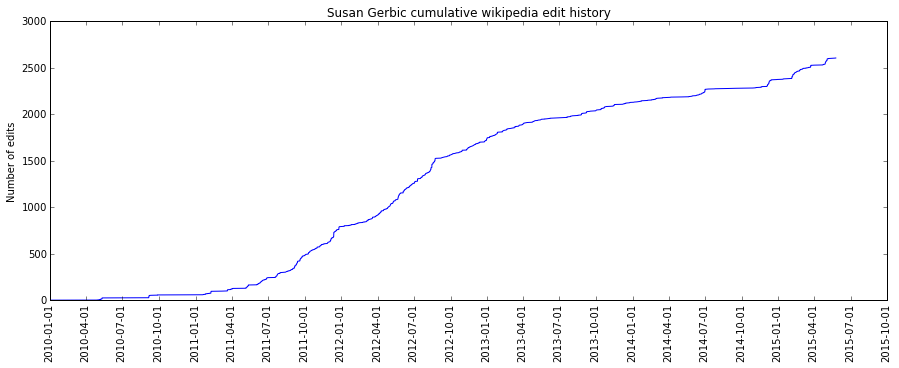

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df.delta2, df.cc)
plt.title('Susan Gerbic cumulative wikipedia edit history')
plt.ylabel('Number of edits')
plt.xticks(xticks, pd.Series(ticks).apply(lambda x: str(x)[0:10]), rotation=90)
plt.savefig('susan.png')
plt.show()